I am using amazon sales dataset (link: https://www.kaggle.com/datasets/edusanketdk/electronics).

I need to import all needed libraries, such as Pandas, Numpy, Matplotlib and Seaborn. I will use these for cleaning the dataset and then visualising data so that it brings some useful insights in the data.

Finally I will import the dataset.

In [2]:
#libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#dataset
dataset = pd.read_csv('.\\electronics.csv')

Now I will check first and last five rows of the dataset using head() and tail() functions. Doing that gives a quick insight of what the dataset brings to us.

In [4]:
#display first 5 rows
dataset.head()

,item_id,user_id,rating,timestamp,model_attr,category,brand,year,user_attr,split
0,0,0,5.0,1999-06-13,Female,Portable Audio & Video,NaN,1999,NaN,0
1,0,1,5.0,1999-06-14,Female,Portable Audio & Video,NaN,1999,NaN,0
2,0,2,3.0,1999-06-17,Female,Portable Audio & Video,NaN,1999,NaN,0
3,0,3,1.0,1999-07-01,Female,Portable Audio & Video,NaN,1999,NaN,0
4,0,4,2.0,1999-07-06,Female,Portable Audio & Video,NaN,1999,NaN,0


In [5]:
#display last 5 rows
dataset.tail()

,item_id,user_id,rating,timestamp,model_attr,category,brand,year,user_attr,split
1292949,9478,1157628,1.0,2018-09-26,Female,Headphones,Etre Jeune,2017,NaN,0
1292950,9435,1157629,5.0,2018-09-26,Female,Computers & Accessories,NaN,2017,NaN,0
1292951,9305,1157630,3.0,2018-09-26,Female,Computers & Accessories,NaN,2016,NaN,0
1292952,9303,1157631,5.0,2018-09-29,Male,Headphones,NaN,2018,NaN,0
1292953,9478,1157632,1.0,2018-10-01,Female,Headphones,Etre Jeune,2017,Female,0


We can also get the information about number of rows and columns using shape attribute.

In [7]:
#display size of the dataset
dataset.shape

(1292954, 10)

Now It's time to get some information about the columns and their data types. We can achieve that using info() function.

In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1292954 entries, 0 to 1292953
Data columns (total 10 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   item_id     1292954 non-null  int64  
 1   user_id     1292954 non-null  int64  
 2   rating      1292954 non-null  float64
 3   timestamp   1292954 non-null  object 
 4   model_attr  1292954 non-null  object 
 5   category    1292954 non-null  object 
 6   brand       331120 non-null   object 
 7   year        1292954 non-null  int64  
 8   user_attr   174124 non-null   object 
 9   split       1292954 non-null  int64  
dtypes: float64(1), int64(4), object(5)
memory usage: 98.6+ MB


We should clean the dataset a bit, by changing the data types of columns so everything would be as it is supposed to be. We have to import datetime library so as to change timestamp data type from object to timestamp.

In [20]:
#libary
from datetime import datetime

#change timestamp data type
dataset['timestamp'] = pd.to_datetime(dataset['timestamp'])

In [21]:
#brand is an object but should be a string
dataset['brand'] = dataset['brand'].astype(str)

In [22]:
#category is an object but should be a string
dataset['category'] = dataset['category'].astype(str)

In [23]:
#user_id is an int64 but should be a string
dataset['user_id'] = dataset['user_id'].astype(str)

In [24]:
#item_id is an int64 but should be a string
dataset['item_id'] = dataset['item_id'].astype(str)

Now we can check if operations above were successful by using info() function again.

In [25]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1292954 entries, 0 to 1292953
Data columns (total 10 columns):
 #   Column      Non-Null Count    Dtype         
---  ------      --------------    -----         
 0   item_id     1292954 non-null  object        
 1   user_id     1292954 non-null  object        
 2   rating      1292954 non-null  float64       
 3   timestamp   1292954 non-null  datetime64[ns]
 4   model_attr  1292954 non-null  object        
 5   category    1292954 non-null  object        
 6   brand       1292954 non-null  object        
 7   year        1292954 non-null  int64         
 8   user_attr   174124 non-null   object        
 9   split       1292954 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(6)
memory usage: 98.6+ MB


Also to get a better understanding of a dataset we can use describe() function, which will give us information like: max, min, mean, etc.

In [26]:
dataset.describe()

,rating,timestamp,year,split
count,1.292954e+06,1292954,1.292954e+06,1.292954e+06
mean,4.051482e+00,2015-06-18 11:30:34.851355904,2.012938e+03,1.747587e-01
min,1.000000e+00,1999-06-13 00:00:00,1.999000e+03,0.000000e+00
25%,4.000000e+00,2014-09-06 00:00:00,2.012000e+03,0.000000e+00
50%,5.000000e+00,2015-10-19 00:00:00,2.014000e+03,0.000000e+00
75%,5.000000e+00,2016-10-19 00:00:00,2.015000e+03,0.000000e+00
max,5.000000e+00,2018-10-01 00:00:00,2.018000e+03,2.000000e+00
std,1.379732e+00,NaN,2.643513e+00,5.506810e-01


the statistical summary of the dataset gives us the following information:

Mean rating is 4.

Minimum rating is 1.

Maximum rating is 5.

Standard deviation of the ratings is 1.4.

25th percentile of the ratings is 4.

50th percentile of the ratings is 5.

75th percentile of the ratings is 5.

Additionally I will use nunique() function to get the number of unique users and items in the dataset

In [27]:
dataset.nunique()

item_id          9560
user_id       1157633
rating              5
timestamp        6354
model_attr          3
category           10
brand              51
year               20
user_attr           2
split               3
dtype: int64

Also, checking for duplicates is a great habit. I can do that using duplicated() function and then summing each duplicate to get the number of them using sum() function. What's more, I will check for missing values using the same method as for duplicates, with the difference of using isnull() function.

In [29]:
#duplicates
dataset.duplicated().sum()

0

In [30]:
#missing values
dataset.isnull().sum()

item_id             0
user_id             0
rating              0
timestamp           0
model_attr          0
category            0
brand               0
year                0
user_attr     1118830
split               0
dtype: int64

As we can see, there are no duplicates at all. Although there is one column with a lot of missing values, which is user_attr. Luckily this column is not helpful in any way for analysis, so it is not a big deal, I will drop all the missing values, by using dropna() function and then check again using isnull() and sum() functions.

In [31]:
#drop missing values
dataset.dropna(inplace=True)

#check again
dataset.isnull().sum()

item_id       0
user_id       0
rating        0
timestamp     0
model_attr    0
category      0
brand         0
year          0
user_attr     0
split         0
dtype: int64

The dataset seems to be clean now, we can go into the visualisation and analysis of data.

Firstly, we can display a simple graph showing the distribution of ratings. We use imported seaborn library to do that.

<Axes: xlabel='rating', ylabel='count'>

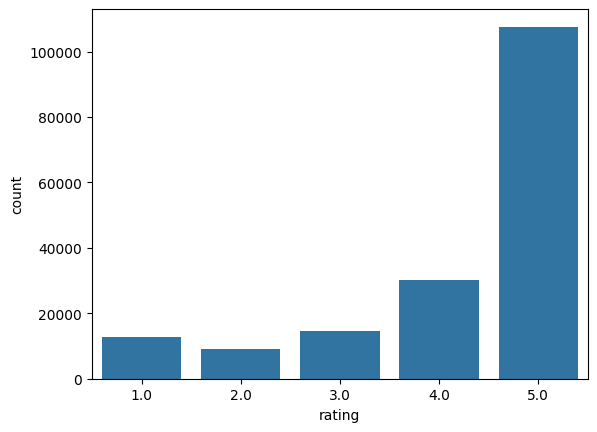

In [32]:
sns.countplot(x='rating', data=dataset)

As we can see, majority of ratings are '5', but we can't really tell exactly how many, so we can get an information about the specific count of each review using value_counts() function.

In [37]:
dataset['rating'].value_counts()

rating
5.0    107593
4.0     30104
3.0     14593
1.0     12652
2.0      9182
Name: count, dtype: int64

We can get information about what was the best year of sales.

In [56]:
dataset['year'] = pd.DatetimeIndex(dataset['timestamp']).year

dataset['year'].value_counts()

year
2015    46891
2016    43907
2014    25475
2017    24753
2013    12355
2018     8874
2012     4357
2011     2679
2010     1717
2009     1220
2008      834
2007      525
2006      196
2005      149
2004       87
2003       55
2002       26
2001       18
2000        5
1999        1
Name: count, dtype: int64

What's more, we can get the information about the best month in terms of sales.

In [57]:
dataset['month'] = pd.DatetimeIndex(dataset['timestamp']).month

dataset['month'].value_counts()

month
1     18762
12    17134
2     15033
3     14853
8     14789
7     14439
11    13412
4     13359
5     13258
9     13155
6     12970
10    12960
Name: count, dtype: int64

January is the most month, followed by December and then February.

Now we can get the visualiation of sales distribution during the years

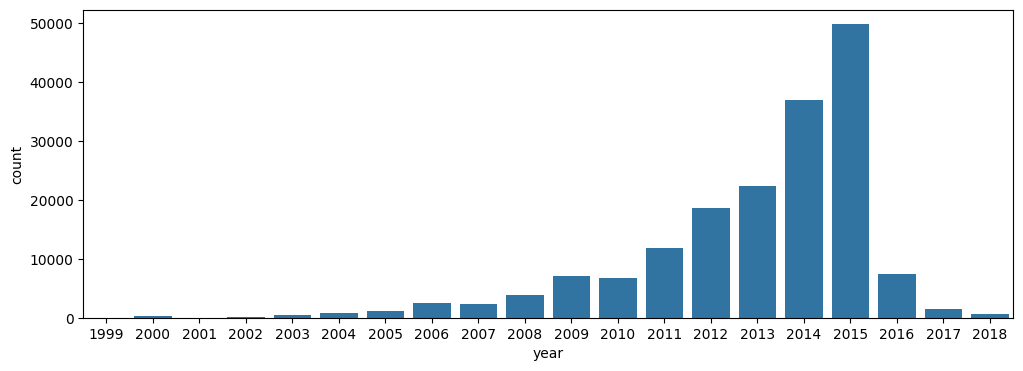

In [36]:
plt.figure(figsize=(12,4)) #make the chart wider for better visibility
sns.countplot(x='year', data=dataset)
plt.show()

2015 was the best year for sales.
Which brands achieved the most and which achieved the least sales?

We can check that by creating 2 plots, and using value_counts(), iloc[] and indexing. With iloc[1:10] we can get top 10 most selling brands, with iloc[-10:] we can get top 10 least selling brands

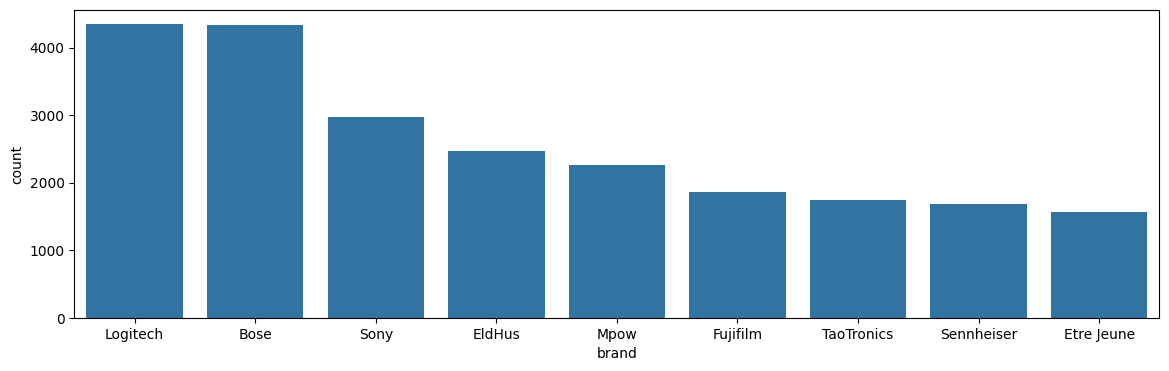

In [42]:
#top 10 most selling brands
plt.figure(figsize=(14,4)) #make the chart wider for better visibility
sns.countplot(x='brand', data=dataset, order=dataset['brand'].value_counts().iloc[1:10].index)
plt.show()

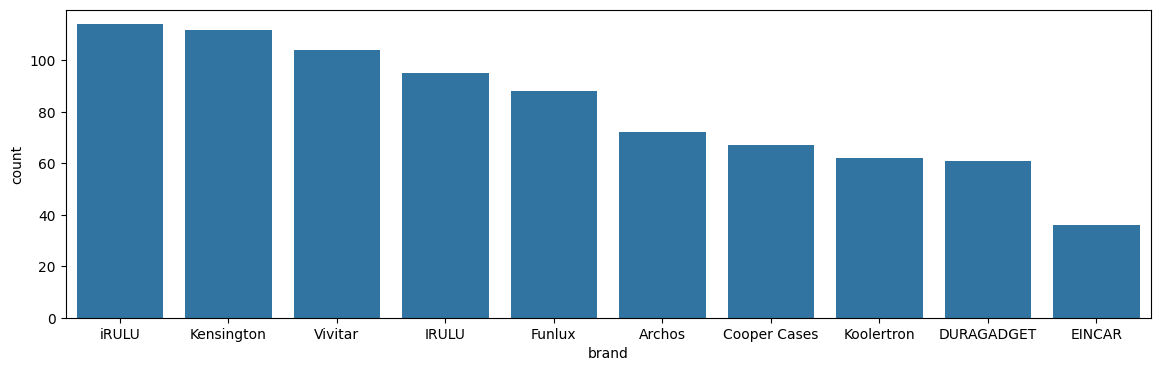

In [41]:
#top 10 least selling brands
plt.figure(figsize=(14,4)) #make the chart wider for better visibility
sns.countplot(x='brand', data=dataset, order=dataset['brand'].value_counts().iloc[-10:].index)
plt.show()

We can see that Logitech, Bose and Sony sold the most, while Koolertron, DURAGADGET and Eincar sold the least.

To get more detailed data across some time period, we can display top 10 brands in terms of sales in 3 consecutive years, for example 2013, 2014, 2015.

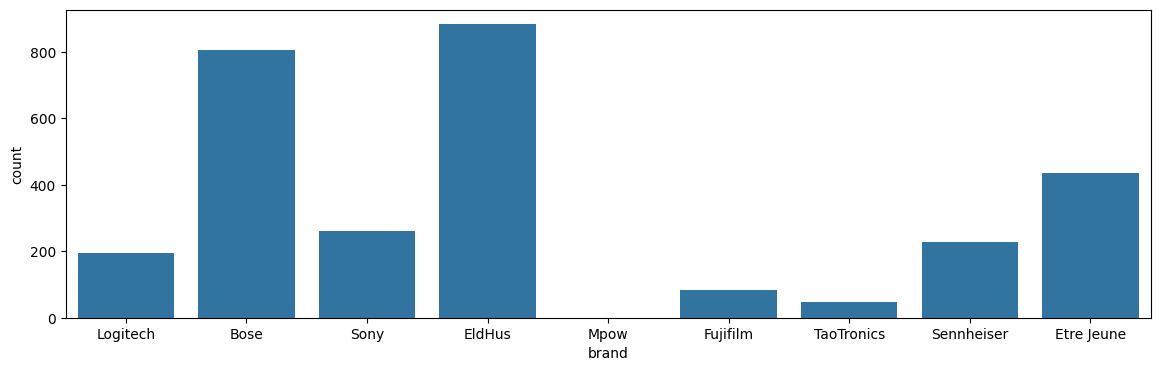

In [52]:
#2013
plt.figure(figsize=(14,4)) #make the chart wider for better visibility
sns.countplot(x='brand', data=dataset[dataset['year'] == 2013], order=dataset['brand'].value_counts().iloc[1:10].index)
plt.show()

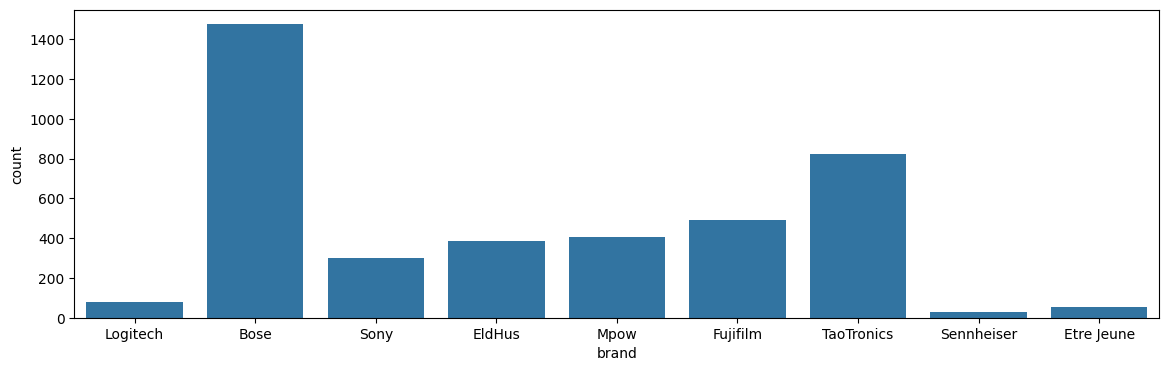

In [53]:
#2014
plt.figure(figsize=(14,4)) #make the chart wider for better visibility
sns.countplot(x='brand', data=dataset[dataset['year'] == 2014], order=dataset['brand'].value_counts().iloc[1:10].index)
plt.show()

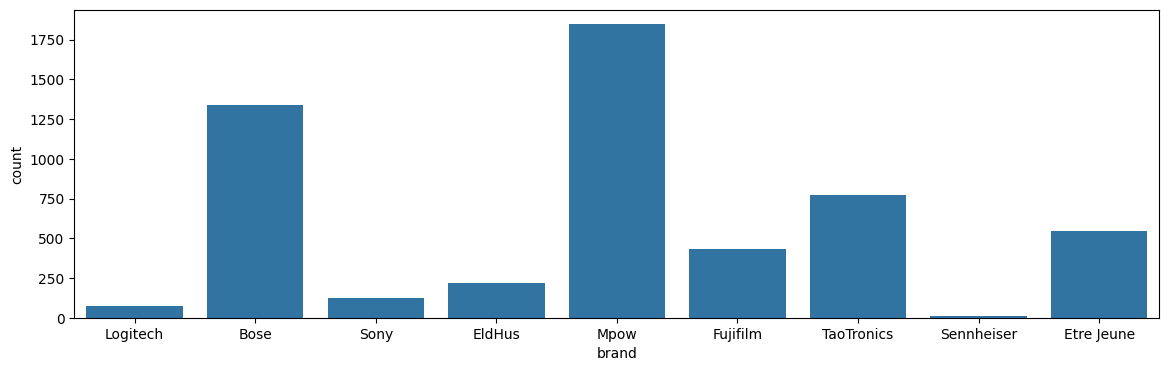

In [54]:
#2015
plt.figure(figsize=(14,4)) #make the chart wider for better visibility
sns.countplot(x='brand', data=dataset[dataset['year'] == 2015], order=dataset['brand'].value_counts().iloc[1:10].index)
plt.show()

As we can see, 'Bose' has performed the best during these 3 years, having most sales only in 2014, but maintaining strong second place in both 2013 and 2015. 'EldHus' and 'Mpow brand' were number 1 for some time but it wasn't consistent. Seems like 'Logitech' rise was definitely not during years 2013-2015

We can also get sales number in each month to understand, during which parts of a year, people tend to buy more.

<Axes: xlabel='month', ylabel='count'>

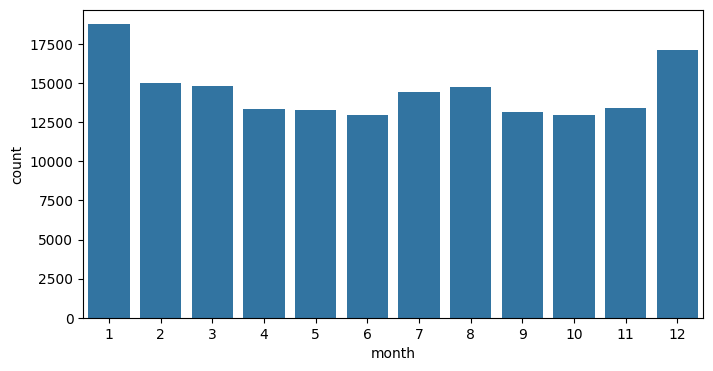

In [60]:
plt.figure(figsize=(8,4))
sns.countplot(x='month', data=dataset)

We can check which product category was the msot popular in the whole time period.

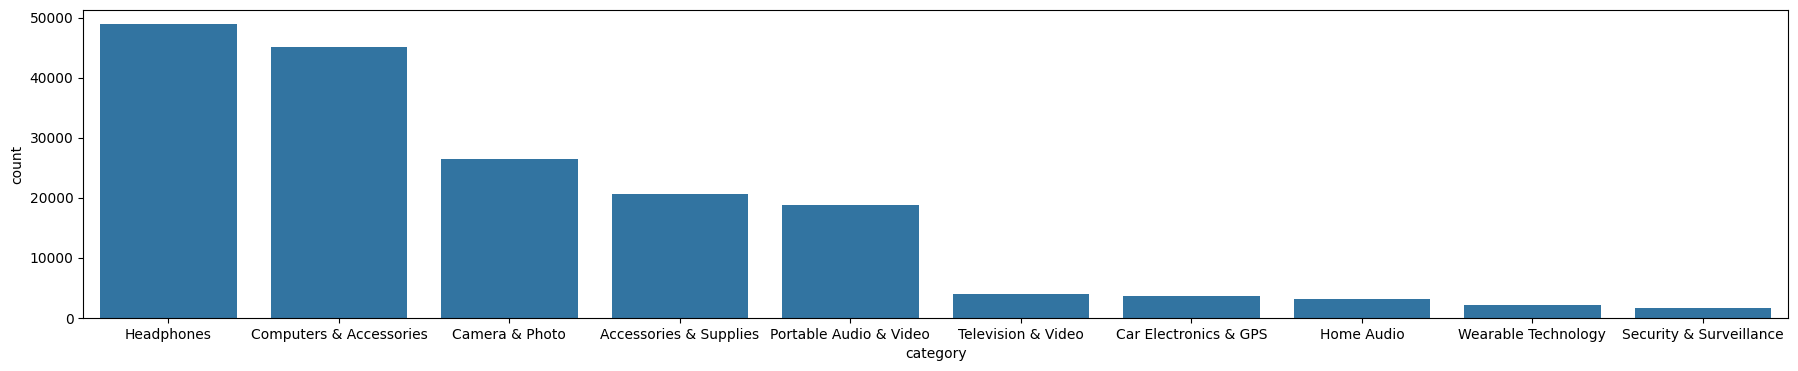

In [69]:
plt.figure(figsize=(22,4))
sns.countplot(x='category', data=dataset, order=dataset['category'].value_counts().iloc[-10:].index)
plt.show()

The category with the least sales was Security & Surveillance while the most sales were Headphones.

Also we can check which product category was the most popular in January.

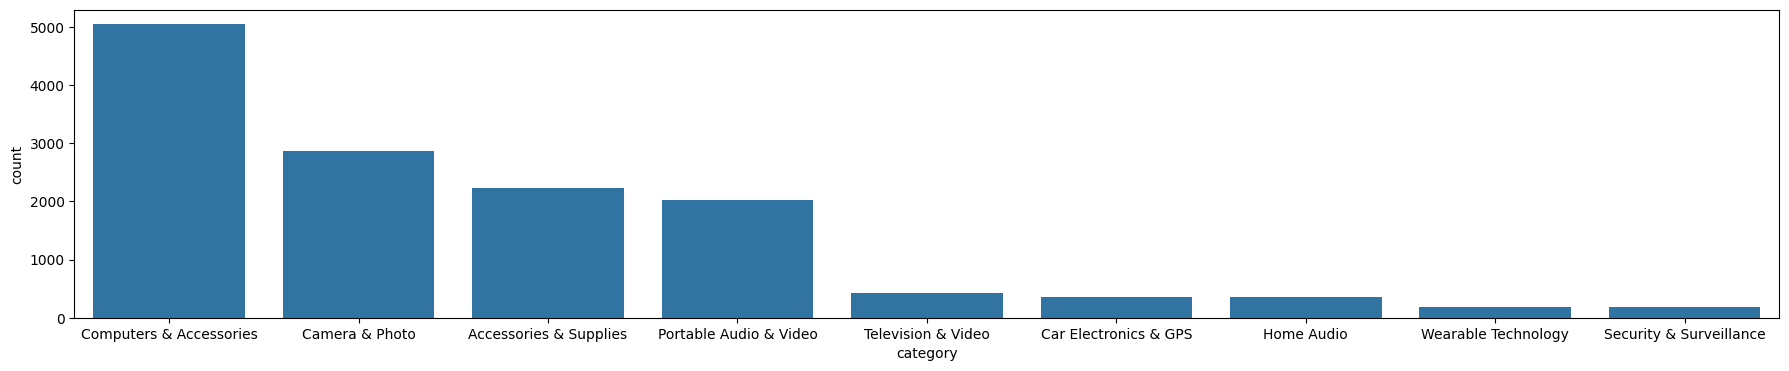

In [66]:
plt.figure(figsize=(22,4))
sns.countplot(x='category', data=dataset[dataset['month'] == 1], order=dataset['category'].value_counts().iloc[1:10].index)
plt.show()

We can see that 'Computers & Accessories' were the most popular category.

Additionally, we can make a pie chart containing categories

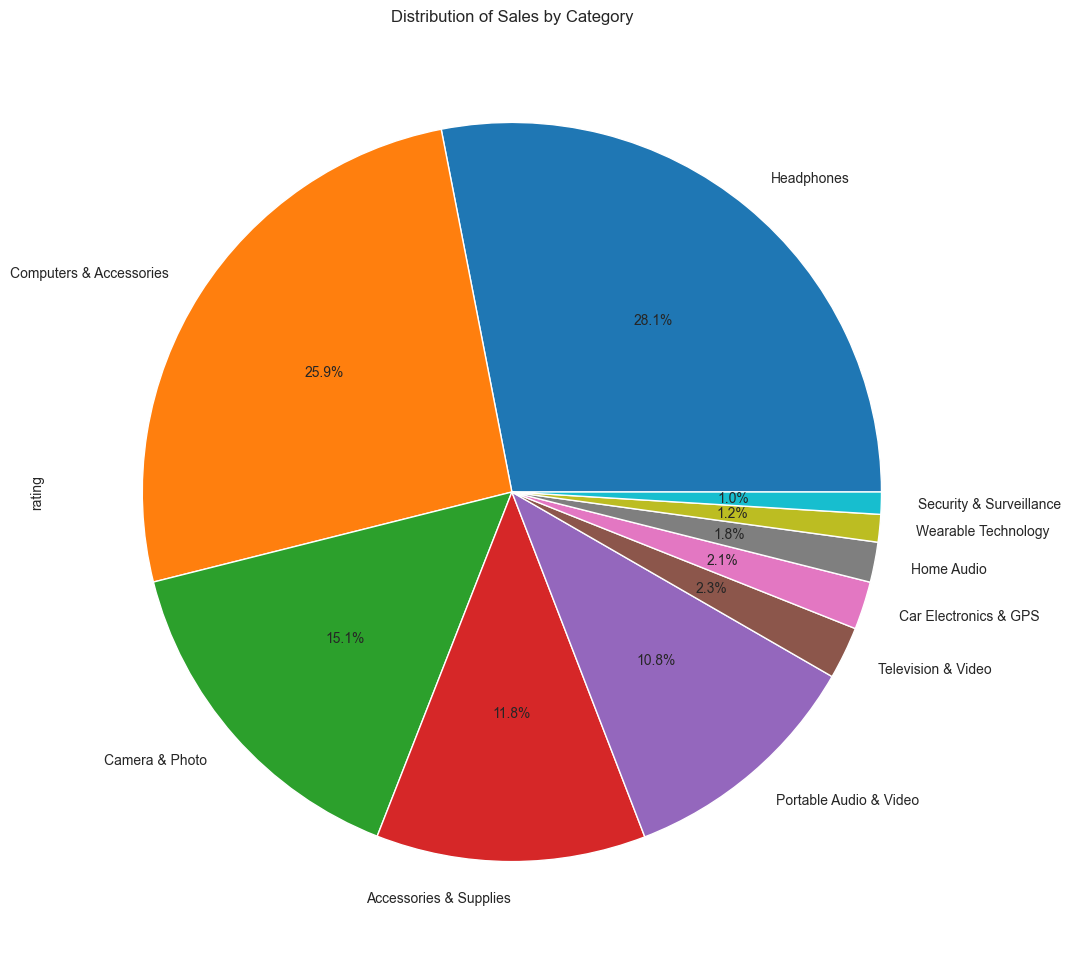

In [72]:
sns.set_style('white')

fig, ax = plt.subplots(figsize=(12, 12))

dataset.groupby('category')['rating'].count().sort_values(ascending=False).head(10).plot(kind='pie', ax=ax, autopct='%1.1f%%')

ax.set_title('Distribution of Sales by Category')

plt.show()

Analysis Summary:

Peak Sales Year: Our analysis indicates that 2015 was the most successful year for sales.

Top Sales Month: January emerged as the month with the highest sales.

Leading Brands: Bose and Logitech were the top-selling brands.

Popular Category: Headphones were the best-selling product category.

Lowest Selling Brands: EINCAR and DURAGADGET had the lowest sales, with EINCAR performing the least.

Lowest Selling Category: The Security and Surveillance category had the fewest sales.